In [1]:
from objective_func import stimulate, f
from genetic_algorithm import genetic_algorithm
from cross_entropy import cross_entropy_method
from random_exploration import random_exploration
import numpy as np
import brian2 as b2
import matplotlib.pyplot as plt
from experiment_params import *

In [2]:
avg_score_hist = []
avg_best_stim = []
for _ in range(5):
    b2.start_scope()
    best_stim, score_hist = genetic_algorithm(t_max, m, k, crossover_rate, mutation_rate, ga_sigma)
    # best_stim, score_hist = cross_entropy_method(t_max, ce_sigma)
    # best_stim, score_hist = random_exploration(t_max)
    avg_score_hist.append(score_hist)
    avg_best_stim.append(best_stim)
    print(best_stim)
    print(score_hist)

Generation:  0


WARNING    'i' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 7. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'm' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 20. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'i' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 7. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'm' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 20. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Generation:  1
Generation:  2
Generation:  3
Generation:  4
Generation:  5
Generation:  6
Generation:  7
Generation:  8
Generation:  9
Generation:  10
Generation:  11
Generation:  12
Generation:  13
Generation:  14
Generation:  15
Generation:  16
Generation:  17
Generation:  18
Generation:  19
[ 0.96791781 -1.3863217  -1.09096001  3.13780605 -0.6226103  -0.56893883
 -1.18417224  1.5282502 ]
[3.6, 2.25, 1.45, 1.8, 1.85, 1.65, 1.5, 1.9, 1.6, 1.55, 1.45, 1.6, 1.3, 1.9, 1.7, 1.4, 1.55, 1.1, 1.15, 1.95, 1.75]
Generation:  0
Generation:  1
Generation:  2
Generation:  3
Generation:  4
Generation:  5
Generation:  6
Generation:  7
Generation:  8
Generation:  9
Generation:  10
Generation:  11
Generation:  12
Generation:  13
Generation:  14
Generation:  15
Generation:  16
Generation:  17
Generation:  18
Generation:  19
[ 0.13482367 -1.49750725 -0.64000636  4.17657887  1.35993715  0.45008501
 -6.79526664  1.34024852]
[4.75, 3.5, 3.4, 2.35, 2.0, 1.6, 1.75, 1.9, 1.5, 1.25, 1.4, 1.25, 1.6, 1.55, 1.25

In [3]:
print(avg_score_hist)
print(avg_best_stim)

[[3.6, 2.25, 1.45, 1.8, 1.85, 1.65, 1.5, 1.9, 1.6, 1.55, 1.45, 1.6, 1.3, 1.9, 1.7, 1.4, 1.55, 1.1, 1.15, 1.95, 1.75], [4.75, 3.5, 3.4, 2.35, 2.0, 1.6, 1.75, 1.9, 1.5, 1.25, 1.4, 1.25, 1.6, 1.55, 1.25, 1.55, 1.2, 1.5, 1.5, 1.65, 1.4], [4.35, 3.05, 2.65, 2.3, 1.85, 1.25, 1.05, 1.15, 1.1, 1.15, 1.1, 1.35, 1.55, 1.5, 1.65, 1.2, 1.15, 1.3, 1.1, 1.2, 1.15], [3.4, 2.9, 1.45, 1.2, 1.55, 1.7, 1.55, 1.9, 2.0, 1.45, 1.3, 1.4, 1.8, 1.7, 1.55, 1.9, 1.4, 1.5, 1.25, 1.15, 1.0], [3.65, 2.5, 1.7, 2.05, 1.45, 1.3, 1.5, 1.4, 1.3, 1.15, 1.45, 1.25, 1.45, 1.4, 1.0, 1.3, 1.2, 1.2, 1.25, 1.2, 1.35]]
[array([ 0.96791781, -1.3863217 , -1.09096001,  3.13780605, -0.6226103 ,
       -0.56893883, -1.18417224,  1.5282502 ]), array([ 0.13482367, -1.49750725, -0.64000636,  4.17657887,  1.35993715,
        0.45008501, -6.79526664,  1.34024852]), array([ 1.61133661, -3.37963951,  2.55248017,  3.62761988,  1.09691539,
       -0.44837167, -0.70563595,  3.42722662]), array([ 1.29218547, -0.38744156, -3.04680226,  2.761501

In [4]:
ga_score_hist = np.mean(avg_score_hist, axis=0)
ga_best_stim = np.mean(avg_best_stim, axis=0)
# ce_score_hist = np.mean(avg_score_hist, axis=0)
# ce_best_stim = np.mean(avg_best_stim, axis=0)

In [5]:
print(ga_score_hist)
print(ga_best_stim)
# print(ce_score_hist)
# print(ce_best_stim)

[3.95 2.84 2.13 1.94 1.74 1.5  1.47 1.65 1.5  1.31 1.34 1.37 1.54 1.61
 1.43 1.47 1.3  1.32 1.25 1.43 1.33]
[ 1.13147223 -1.12776238 -0.47220289  3.24336899  0.81394118 -1.2212947
 -1.6429327   2.07669995]


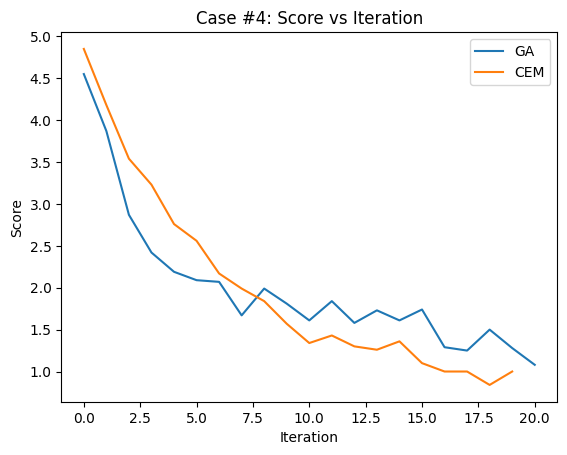

In [12]:
# Plot of the score
plt.figure()
plt.plot(ga_score_hist, label="GA")
plt.plot(ce_score_hist, label="CEM")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.title("Case #4: Score vs Iteration")
plt.legend()
plt.savefig("Case#4_Score_vs_Iteration.png")
plt.show()

In [6]:
# sanity check
stim_pattern = np.array(ga_best_stim) * b2.nA
statemon, spikemon, ratemon = stimulate(synapse_w, stim_pattern)
print(spikemon.count)
eval = f(np.array(spikemon.count), target_pattern)
print(eval)

<spikemonitor.count: array([1, 0, 1, 1, 1, 0, 0, 1])>
1


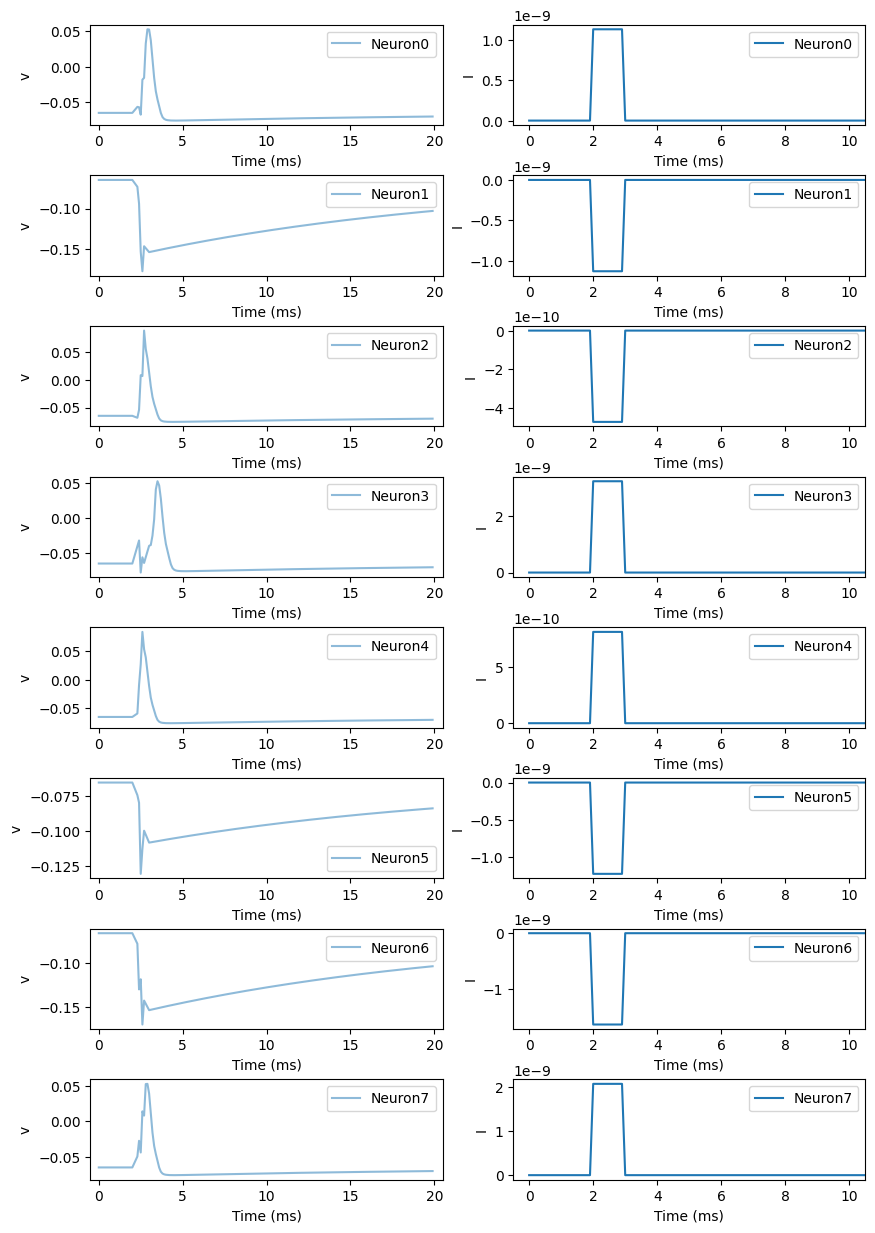

In [7]:
color = ['r', 'g', 'b', 'y', 'c']
duration = 20*b2.ms
# plot
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.5)
for i in range(num_neurons):
    plt.subplot(num_neurons,2,i*2+1)
    plt.plot(statemon.t/b2.ms, statemon.v[i], label='Neuron'+str(i), alpha=0.5)
    # index = np.where(spikemon.i == i)[0]
    # if index.size != 0:
    #     plt.axvline((spikemon.t/b2.ms)[np.where(spikemon.i == i)[0][0]], color='r', linestyle='--', label='spike time')
    # plt.ylim(-0.1, 0.09)
    plt.xlim(-0.5, int(duration/b2.ms)+0.5)
    plt.xlabel('Time (ms)')
    plt.ylabel('v')
    plt.legend()

    plt.subplot(num_neurons,2,i*2+2)
    plt.plot(statemon.t/b2.ms, statemon.I[i], label='Neuron'+str(i))
    # plt.ylim(-80/1000, 80/1000)
    plt.xlim(-0.5, 10.5)
    plt.xlabel('Time (ms)')
    plt.ylabel('I')
    plt.legend()

# plt.title('GA Case#1: Neuron Voltage Response and Stimulus Current')
plt.savefig('Case#1_GA.png')
plt.show()

# # plt.subplot(7,2,13)
# plt.plot(spikemon.t/b2.ms, spikemon.i, '.k')
# plt.xlabel('Time (ms)')
# plt.ylabel('Neuron index')
# plt.ylim(-1, num_neurons)
# plt.xlim(-0.5, int(duration/b2.ms)+0.5)
# plt.yticks(list(range(num_neurons)))
# plt.savefig('spiketrain_02.png')
# plt.show()